<a href="https://colab.research.google.com/github/sesmael/ECGR-4105/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###### Cancer dateset setup ######
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

(569, 30)

In [2]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
breast_labels = breast.target
breast_labels.shape
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()

<ipython-input-6-4603eb07c402>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_dataset['label'].replace(0, 'Benign',inplace=True)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


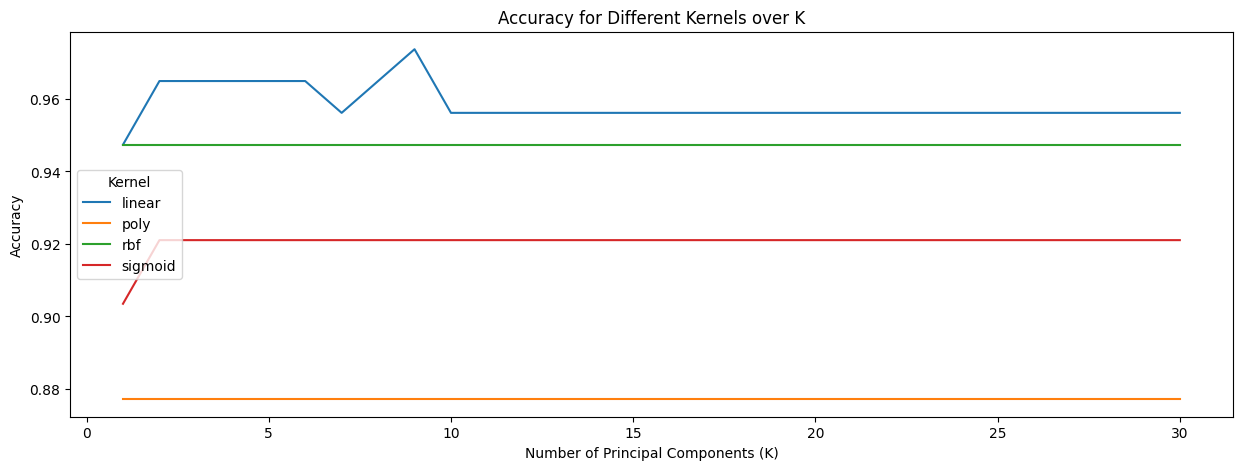

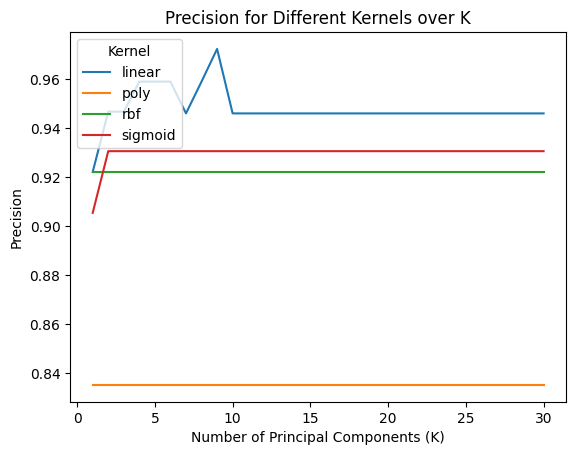

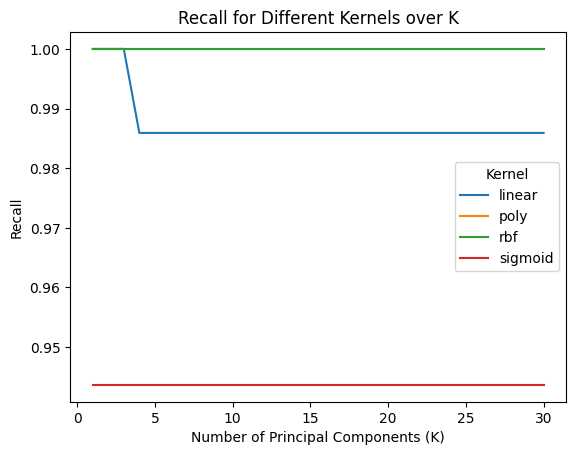

In [13]:
############## Problem 1 ##############

from sklearn.model_selection import train_test_split

# Separate features and labels
X = breast_dataset[features]
y = breast_dataset['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### PCA Feature extraction ###
from sklearn.decomposition import PCA

# Loop through different values of K (number of components)
K_values = range(1, len(features) + 1)  # Adjust K range based on the dataset

pca_results = []
for K in K_values:
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Store transformed data for SVM classification
    pca_results.append((K, X_train_pca, X_test_pca))

### SVM classification ###

    from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Track accuracy, precision, recall for different kernels and values of K
results = {'K': [], 'Kernel': [], 'Accuracy': [], 'Precision': [], 'Recall': []}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']  # Explore various kernels

for K, X_train_pca, X_test_pca in pca_results:
    for kernel in kernels:
        svm = SVC(kernel=kernel)
        svm.fit(X_train_pca, y_train)

        # Make predictions and calculate metrics
        y_pred = svm.predict(X_test_pca)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label='Malignant')
        recall = recall_score(y_test, y_pred, pos_label='Malignant')

        # Append results
        results['K'].append(K)
        results['Kernel'].append(kernel)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)

import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting Accuracy, Precision, Recall for different values of K and kernels
plt.figure(figsize=(15, 5))
for metric in ['Accuracy', 'Precision', 'Recall']:
    sns.lineplot(data=results_df, x='K', y=metric, hue='Kernel')
    plt.title(f'{metric} for Different Kernels over K')
    plt.xlabel('Number of Principal Components (K)')
    plt.ylabel(metric)
    plt.legend(title='Kernel')
    plt.show()



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv')

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


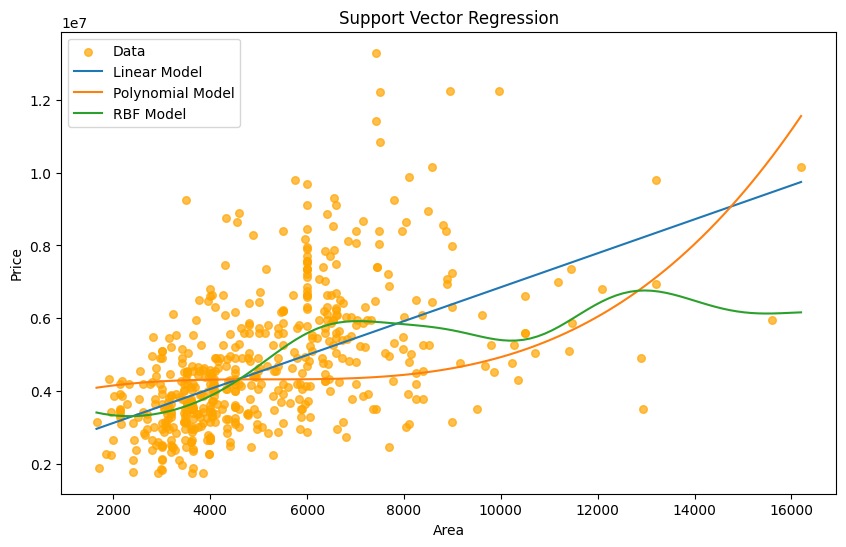

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Example data: replace this with your actual data for 'Area' and 'Price'
X = data[['area']].values  # Only using 'area' feature for 2D plotting purposes
y = data['price'].values

# Scale the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Define and fit SVR models with different kernels
kernels = {'Linear': 'linear', 'Polynomial': 'poly', 'RBF': 'rbf'}
models = {}

for name, kernel in kernels.items():
    svr = SVR(kernel=kernel)
    svr.fit(X_scaled, y_scaled)
    models[name] = svr

# Generate predictions for plotting the model curves
X_plot = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1, 1)
y_pred = {name: model.predict(X_plot) for name, model in models.items()}

# Transform predictions back to original scale
X_plot_original = scaler_X.inverse_transform(X_plot)
y_pred_original = {name: scaler_y.inverse_transform(pred.reshape(-1, 1)).flatten() for name, pred in y_pred.items()}
y_actual = scaler_y.inverse_transform(y_scaled.reshape(-1, 1)).flatten()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y_actual, color='orange', label='Data', s=30, alpha=0.7)  # Actual data points

# Plot each model's predictions
for name, y_vals in y_pred_original.items():
    plt.plot(X_plot_original, y_vals, label=f'{name} Model')

plt.title('Support Vector Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
R2 score: 0.3408125506467298
Mean Squared Error: 3331909268274.803


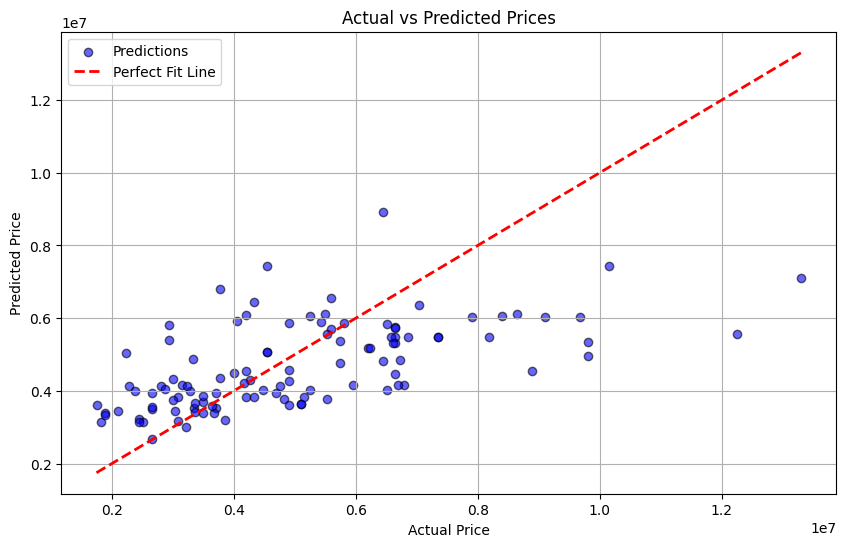

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Load your data (assuming it's in a DataFrame named 'data')
# Replace 'area', 'bedrooms', and 'price' with your actual column names
X = data[['area', 'bedrooms']].values  # Replace with actual feature names
y = data['price'].values  # Replace with the actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Set up the SVR model with RBF kernel
svr = SVR()

# Define parameter grid for GridSearchCV
param_grid = {
    'kernel': ['rbf', 'linear'],  # testing both RBF and Linear kernels
    'C': [0.1, 1, 10, 100],       # range of regularization parameters
    'epsilon': [0.01, 0.1, 0.2],  # margin of tolerance
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # range of gamma values for RBF
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, scoring='r2', cv=5, verbose=1)
grid_search.fit(X_train_scaled, y_train_scaled)

# Get the best estimator and print best parameters
best_svr = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Predict using the best model on the test set
y_pred_scaled = best_svr.predict(X_test_scaled)

# Transform predictions back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate R2 score and Mean Squared Error
r2 = r2_score(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)

print(f"R2 score: {r2}")
print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred, color='blue', alpha=0.6, edgecolor='k', label='Predictions')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2, label='Perfect Fit Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()
